# Clustering

Sklearn feature extraction methods are used to get features from image data
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction. 



### Classification code

In [1]:
import h5py
import toyplot
import numpy as np
import pandas as pd

### Load in databases from a simulation run

In [130]:
# load in the counts data
with h5py.File("../databases/tr5-t5-r2-s1000.counts.h5") as io5:
    counts = io5["counts"][:]
    
# make a flattened array for models that are non-spatial    
fcounts = np.array([i.flatten() for i in counts[:]])

# print data shape
print(counts.shape)
print(fcounts.shape)

(320, 5, 16, 16)
(320, 1280)


In [131]:
from sklearn.feature_extraction.image import grid_to_graph
connectivity = grid_to_graph(16, 16, 5, dtype=np.float32)
connectivity



<1280x1280 sparse matrix of type '<class 'numpy.float32'>'
	with 8128 stored elements in COOrdinate format>

In [132]:

print(__doc__)

import time as time

import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering


# #############################################################################
# Generate data
orig_coins = coins()

# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect")

X = np.reshape(rescaled_coins, (-1, 1))

print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_coins.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Automatically created module for IPython interactive environment


ModuleNotFoundError: No module named 'skimage'

In [147]:
import time as time

import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering


# #############################################################################
# Generate data
orig_coins = coins()

# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect")

X = np.reshape(rescaled_coins, (-1, 1))

X.shape

(4697, 1)

In [135]:
# #############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*rescaled_coins.shape)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(
    n_clusters=n_clusters, 
    linkage='ward',
    connectivity=connectivity,
)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_coins.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

label

/home/deren/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/deren/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Compute structured hierarchical clustering...
Elapsed time:  0.23555755615234375
Number of pixels:  4697
Number of clusters:  27


array([[1, 1, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

/home/deren/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/deren/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Compute structured hierarchical clustering...
Elapsed time:  0.22697019577026367
Number of pixels:  4697
Number of clusters:  27


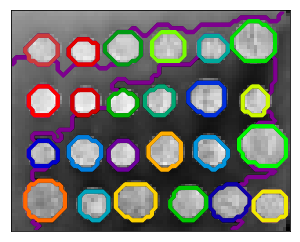

In [134]:
# #############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

In [3]:
# load in the features database
with h5py.File("../databases/tr5-t5-r2-s1000.labels.h5") as io5:
    df = pd.DataFrame({
        "theta": io5["thetas"][:],
        "asource": io5["admix_sources"][:].flatten(),
        "atarget": io5["admix_targets"][:].flatten(),
        "atimes": io5["admix_times"][:].flatten(),
        "aprops": io5["admix_props"][:].flatten(),
    })
    
# head of dataframe
df.sample(10)

,theta,asource,atarget,atimes,aprops
252,0.468713,1,3,0.375,0.365693
148,0.372602,6,4,1.875,0.187786
91,0.183463,3,6,1.875,0.355433
272,0.592852,1,0,0.375,0.249802
258,0.153717,1,3,0.375,0.468481
284,0.617211,0,4,0.375,0.151339
188,0.568378,2,5,1.125,0.041904
111,0.805385,3,5,1.125,0.357021
247,0.543210,1,4,0.375,0.052666
47,0.299389,4,5,1.125,0.096493


## Unsupervised learning to get features

NMF

In [41]:
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)


In [105]:
df.head(20)

,theta,asource,atarget,atimes,aprops
0,0.399015,4,7,2.625,0.498961
1,0.399015,4,7,2.625,0.498961
2,0.294614,4,7,2.625,0.274467
3,0.294614,4,7,2.625,0.274467
4,0.961393,4,7,2.625,0.477726
5,0.961393,4,7,2.625,0.477726
6,0.421910,4,7,2.625,0.010286
7,0.421910,4,7,2.625,0.010286
8,0.707245,4,7,2.625,0.322359
9,0.707245,4,7,2.625,0.322359


In [88]:
from IPython.display import ProgressBar
pb = ProgressBar(100)
pb.progress = 10
pb.display()
pb.

[======                                                      ] 10/100

In [ ]:
canvas.matrix(counts[10].sum(axis=0) - counts[5].sum(axis=0), grid=(1, 3, 2), margin=5);

In [113]:
i = 5
canvas = toyplot.Canvas(width=900, height=300)
canvas.matrix(counts[i].sum(axis=0), grid=(1, 3, 0), margin=5);
canvas.matrix(counts[i].std(axis=0), grid=(1, 3, 1), margin=5);
canvas.matrix(counts[i].mean(axis=0) * counts[i].std(axis=0), grid=(1, 3, 2), margin=5);
i = 6
canvas = toyplot.Canvas(width=900, height=300)
canvas.matrix(counts[i].sum(axis=0), grid=(1, 3, 0), margin=5);
canvas.matrix(counts[i].std(axis=0), grid=(1, 3, 1), margin=5);
canvas.matrix(counts[i].mean(axis=0) * counts[i].std(axis=0), grid=(1, 3, 2), margin=5);

i = 16
canvas = toyplot.Canvas(width=900, height=300)
canvas.matrix(counts[i].sum(axis=0), grid=(1, 3, 0), margin=5);
canvas.matrix(counts[i].std(axis=0), grid=(1, 3, 1), margin=5);
canvas.matrix(counts[i].mean(axis=0) * counts[i].std(axis=0), grid=(1, 3, 2), margin=5);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t87c27ed1348c4f5aae6cdfba5c95a4a2" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 900.0 300.0" width="900.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0 2.280899 1.404494 1.303371 1.269663 0.943820 0.292135 0.000000 0.000000 0.786517 0.000000 0.404494 0.000000 0.865169 0.000000 0.000000 0.460674 1 0.775281 0.044944 0.000000 0.000000 0.044944 0.494382 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2 0.595506 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.044944 0.000000 0.550562 0.000000 0.000000 0.000000 0.000000 0.000000 3 0.393258 0.000000 0.000000 0.022472 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.022472 0.000000 0.000000 0.505618 4 0.674157 0.033708 0.000000 0.000000 0.044944 0.741573 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 5 0.483146 0.887640 0.000000 0.000000 1.764045 2.539326 1.449438 1.685393 0.000000 0.752809 0.325843 0.000000 0.000000 0.988764 0.000000 0.213483 6 0.000000 0.000000 0.000000 0.000000 0.000000 0.550562 0.000000 0.000000 0.000000 0.022472 0.662921 0.000000 0.000000 0.000000 0.000000 0.000000 7 0.000000 0.000000 0.000000 0.000000 0.000000 0.539326 0.000000 0.033708 0.000000 0.000000 0.000000 0.000000 0.000000 0.089888 0.000000 0.539326 8 0.573034 0.000000 0.067416 0.000000 0.000000 0.000000 0.000000 0.000000 0.067416 0.000000 0.550562 0.000000 0.000000 0.000000 0.000000 0.000000 9 0.000000 0.000000 0.000000 0.000000 0.000000 0.415730 0.022472 0.000000 0.000000 0.067416 0.730337 0.000000 0.000000 0.000000 0.000000 0.000000 10 0.393258 0.000000 0.685393 0.000000 0.000000 0.438202 1.123595 0.000000 1.314607 1.775281 2.438202 1.404494 0.000000 0.000000 0.865169 0.325843 11 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.539326 0.089888 0.000000 0.000000 0.044944 0.303371 12 0.528090 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.022472 0.000000 0.000000 0.617977 13 0.000000 0.000000 0.000000 0.000000 0.000000 0.651685 0.000000 0.011236 0.000000 0.000000 0.000000 0.000000 0.000000 0.123596 0.000000 0.550562 14 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.494382 0.044944 0.000000 0.000000 0.000000 0.505618 15 0.314607 0.000000 0.000000 0.764045 0.000000 0.505618 0.000000 0.898876 0.000000 0.000000 0.202247 0.932584 1.370786 1.314607 1.359550 2.202247 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0 0.185254 0.032565 0.039181 0.031461 0.008408 0.016513 0.000000 0.000000 0.015890 0.000000 0.023993 0.000000 0.068012 0.000000 0.000000 0.028778 1 0.044036 0.004494 0.000000 0.000000 0.011009 0.059625 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2 0.045280 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.004494 0.000000 0.041069 0.000000 0.000000 0.000000 0.000000 0.000000 3 0.000000 0.000000 0.000000 0.005504 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.005504 0.000000 0.000000 0.059029 4 0.032565 0.005504 0.000000 0.000000 0.004494 0.025024 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 5 0.027153 0.048925 0.000000 0.000000 0.042991 0.277726 0.045724 0.040199 0.000000 0.027153 0.023993 0.000000 0.000000 0.046923 0.000000 0.017978 6 0.000000 0.000000 0.000000 0.000000 0.000000 0.013103 0.000000 0.000000 0.000000 0.005504 0.039181 0.000000 0.000000 0.000000 0.000000 0.000000 7 0.000000 0.

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t3fde2c565a73421bb45eb73dc4674869" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 900.0 300.0" width="900.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0 2.525000 1.637500 1.187500 1.775000 0.875000 0.375000 0.000000 0.000000 0.962500 0.000000 0.400000 0.000000 0.887500 0.000000 0.000000 0.262500 1 0.625000 0.037500 0.000000 0.000000 0.112500 0.637500 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2 0.650000 0.000000 0.062500 0.000000 0.000000 0.000000 0.000000 0.000000 0.125000 0.000000 0.775000 0.000000 0.000000 0.000000 0.000000 0.000000 3 0.725000 0.000000 0.000000 0.025000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.725000 4 0.537500 0.050000 0.000000 0.000000 0.037500 0.462500 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 5 0.287500 0.800000 0.000000 0.000000 1.875000 2.375000 0.862500 1.412500 0.000000 0.812500 0.375000 0.000000 0.000000 0.950000 0.000000 0.487500 6 0.000000 0.000000 0.000000 0.000000 0.000000 0.600000 0.050000 0.000000 0.000000 0.050000 0.837500 0.000000 0.000000 0.000000 0.000000 0.000000 7 0.000000 0.000000 0.000000 0.000000 0.000000 0.637500 0.000000 0.025000 0.000000 0.000000 0.000000 0.000000 0.000000 0.125000 0.000000 1.012500 8 0.550000 0.000000 0.037500 0.000000 0.000000 0.000000 0.000000 0.000000 0.087500 0.000000 0.787500 0.000000 0.000000 0.000000 0.000000 0.000000 9 0.000000 0.000000 0.000000 0.000000 0.000000 0.900000 0.000000 0.000000 0.000000 0.025000 0.587500 0.000000 0.000000 0.000000 0.000000 0.000000 10 0.300000 0.000000 1.187500 0.000000 0.000000 0.362500 1.012500 0.000000 1.475000 1.712500 2.837500 1.637500 0.000000 0.000000 1.137500 0.250000 11 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.625000 0.050000 0.000000 0.000000 0.025000 0.687500 12 0.537500 0.000000 0.000000 0.012500 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.050000 0.000000 0.000000 0.850000 13 0.000000 0.000000 0.000000 0.000000 0.000000 0.500000 0.000000 0.012500 0.000000 0.000000 0.000000 0.000000 0.000000 0.125000 0.000000 0.837500 14 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.475000 0.000000 0.000000 0.000000 0.025000 0.737500 15 0.362500 0.000000 0.000000 0.975000 0.000000 0.237500 0.000000 1.125000 0.000000 0.000000 0.287500 0.925000 1.550000 2.000000 1.500000 3.050000 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0 0.234601 0.035707 0.028504 0.057337 0.056458 0.020916 0.000000 0.000000 0.032210 0.000000 0.025739 0.000000 0.012247 0.000000 0.000000 0.024238 1 0.020917 0.010000 0.000000 0.000000 0.014577 0.021506 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2 0.083141 0.000000 0.007906 0.000000 0.000000 0.000000 0.000000 0.000000 0.007906 0.000000 0.032210 0.000000 0.000000 0.000000 0.000000 0.000000 3 0.020310 0.000000 0.000000 0.006124 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.029155 4 0.029155 0.005000 0.000000 0.000000 0.010000 0.047170 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 5 0.018708 0.009354 0.000000 0.000000 0.077862 0.190230 0.020000 0.024495 0.000000 0.007906 0.031623 0.000000 0.000000 0.028940 0.000000 0.040620 6 0.000000 0.000000 0.000000 0.000000 0.000000 0.020310 0.012247 0.000000 0.000000 0.005000 0.036742 0.000000 0.000000 0.000000 0.000000 0.000000 7 0.000000 0.

<svg class="toyplot-canvas-Canvas" height="300.0px" id="td39fe3b541d54eb49feb418c5632469d" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 900.0 300.0" width="900.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0 2.753425 2.150685 1.780822 1.136986 0.972603 0.506849 0.000000 0.000000 1.178082 0.000000 0.739726 0.000000 0.835616 0.000000 0.000000 0.465753 1 0.712329 0.136986 0.000000 0.000000 0.082192 1.082192 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2 0.698630 0.000000 0.054795 0.000000 0.000000 0.000000 0.000000 0.000000 0.027397 0.000000 0.506849 0.000000 0.000000 0.000000 0.000000 0.000000 3 0.808219 0.000000 0.000000 0.109589 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.054795 0.000000 0.000000 0.835616 4 0.684932 0.000000 0.000000 0.000000 0.027397 0.397260 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 5 0.397260 0.821918 0.000000 0.000000 1.890411 2.890411 1.684932 1.616438 0.000000 1.013699 0.424658 0.000000 0.000000 1.054795 0.000000 0.246575 6 0.000000 0.000000 0.000000 0.000000 0.000000 0.780822 0.123288 0.000000 0.000000 0.054795 0.493151 0.000000 0.000000 0.000000 0.000000 0.000000 7 0.000000 0.000000 0.000000 0.000000 0.000000 0.602740 0.000000 0.027397 0.000000 0.000000 0.000000 0.000000 0.000000 0.013699 0.000000 0.712329 8 0.616438 0.000000 0.054795 0.000000 0.000000 0.000000 0.000000 0.000000 0.027397 0.000000 0.671233 0.000000 0.000000 0.000000 0.000000 0.000000 9 0.000000 0.000000 0.000000 0.000000 0.000000 0.821918 0.054795 0.000000 0.000000 0.095890 0.671233 0.000000 0.000000 0.000000 0.000000 0.000000 10 0.369863 0.000000 1.000000 0.000000 0.000000 0.397260 0.986301 0.000000 1.684932 1.767123 2.684931 1.561644 0.000000 0.000000 1.109589 0.561644 11 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.506849 0.054795 0.000000 0.000000 0.000000 0.643836 12 0.643836 0.000000 0.000000 0.082192 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.082192 0.000000 0.000000 0.780822 13 0.000000 0.000000 0.000000 0.000000 0.000000 0.972603 0.000000 0.041096 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.698630 14 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.767123 0.095890 0.000000 0.000000 0.000000 1.082192 15 0.520548 0.000000 0.000000 1.178082 0.000000 0.369863 0.000000 1.082192 0.000000 0.000000 0.561644 1.465753 1.890411 1.452055 1.712329 3.082192 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0 0.242493 0.094352 0.045844 0.025407 0.021918 0.052414 0.000000 0.000000 0.063901 0.000000 0.042796 0.000000 0.015975 0.000000 0.000000 0.023568 1 0.018582 0.028734 0.000000 0.000000 0.010251 0.043664 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2 0.015975 0.000000 0.005479 0.000000 0.000000 0.000000 0.000000 0.000000 0.006711 0.000000 0.069634 0.000000 0.000000 0.000000 0.000000 0.000000 3 0.015975 0.000000 0.000000 0.010959 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.010251 0.000000 0.000000 0.026563 4 0.028734 0.000000 0.000000 0.000000 0.006711 0.013422 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 5 0.025110 0.056148 0.000000 0.000000 0.057859 0.245569 0.042971 0.022258 0.000000 0.015975 0.033999 0.000000 0.000000 0.093953 0.000000 0.020502 6 0.000000 0.000000 0.000000 0.000000 0.000000 0.047136 0.020133 0.000000 0.000000 0.013422 0.015975 0.000000 0.000000 0.000000 0.000000 0.000000 7 0.000000 0.

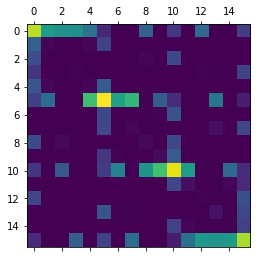

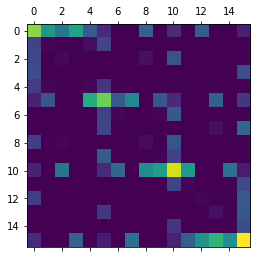

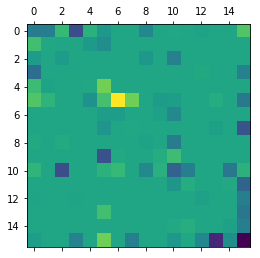

In [90]:
plt.matshow(counts[5].sum(axis=0));
plt.matshow(counts[6].sum(axis=0));
plt.matshow(counts[5].sum(axis=0) - counts[6].sum(axis=0))

In [34]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

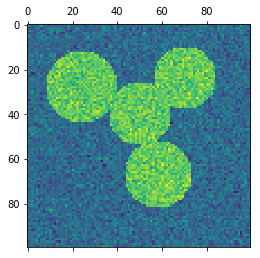

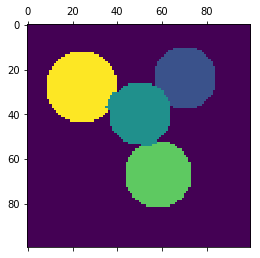

In [29]:
# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

In [28]:
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

ValueError: NumPy boolean array indexing assignment cannot assign 10000 input values to the 2678 output values where the mask is true

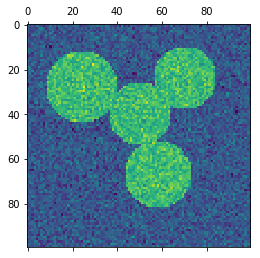

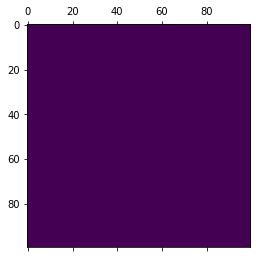

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.matshow(img)
plt.matshow(label_im)
plt.show()

In [5]:
from sklearn.cluster import spectral_clustering
labels = spectral_clustering(fcounts, n_clusters=5, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels


ValueError: array must be 2-dimensional and square. shape = (320, 1280)

In [302]:
clf.predict([[2., 2.]])

array([1])

In [327]:
X = fcounts
y = pd.Categorical([(i, j) for (i, j) in zip(df.asource, df.atarget)]).codes

In [328]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [336]:
clf = svm.SVC(gamma="auto").fit(X_train, y_train)
clf.predict(X_test)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int8)

In [337]:
y_test

array([11, 26, 24, 19, 25, 17, 12, 30,  7, 27, 18, 31, 16,  7, 10, 17,  8,
       31, 20, 15,  8, 28,  9, 13, 23, 28,  2, 21, 31, 12, 31, 25, 11, 29,
        1, 31, 10,  3, 27, 16, 25,  9,  3,  3, 23, 25,  5,  9, 27, 10, 20,
       18,  3, 23, 22, 12,  5, 19, 24, 17, 28, 30,  1,  6, 13,  0, 26,  0,
       26, 14, 15, 15,  6, 29,  3, 21,  5,  9, 30, 28], dtype=int8)

In [227]:
df.loc[(df.asource==4) & (df.atarget==7), "color"] = 3


In [297]:
c, a, m = toyplot.scatterplot(
    tcounts[0], 
    tcounts[1],
    width=400, 
    height=350,
    opacity=0.5,
    size=8,
    #color=[toyplot.color.Palette()[i] for i in df["color"]],
);

<svg class="toyplot-canvas-Canvas" height="350.0px" id="tbc27844280b543c6b4ab8aa73a967a74" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 350.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.0 0.1 0.2 0.3 0.0 0.1 0.2 0.3

### PCA
"relative pixel position is ignored by this model"

In [232]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

2019-03-17 02:25:10,437 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012


Automatically created module for IPython interactive environment


2019-03-17 02:25:11,202 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2019-03-17 02:25:11,885 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2019-03-17 02:25:12,742 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [250]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [251]:
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [252]:
lfw_people['images'].shape

(1288, 50, 37)

In [257]:
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Projecting the input data on the eigenfaces orthonormal basis
done in 0.007s


In [258]:

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
done in 95.072s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/home/deren/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [259]:
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [260]:

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))



Predicting people's names on the test set
done in 0.025s
                   precision    recall  f1-score   support

     Ariel Sharon       0.10      0.15      0.12        13
     Colin Powell       0.43      0.53      0.48        60
  Donald Rumsfeld       0.26      0.33      0.30        27
    George W Bush       0.66      0.58      0.62       146
Gerhard Schroeder       0.17      0.20      0.18        25
      Hugo Chavez       0.25      0.13      0.17        15
       Tony Blair       0.50      0.39      0.44        36

        micro avg       0.46      0.46      0.46       322
        macro avg       0.34      0.33      0.33       322
     weighted avg       0.49      0.46      0.47       322

[[ 2  6  1  3  1  0  0]
 [ 8 32  2 10  4  1  3]
 [ 2  9  9  5  1  0  1]
 [ 7 21 10 84 14  3  7]
 [ 0  1  4 10  5  2  3]
 [ 1  2  2  8  0  2  0]
 [ 1  3  6  7  5  0 14]]
